In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from collections import Counter

In [2]:
# Read the CSV file for RNA-seq
rawGeneEXP_data = pd.read_csv('MDB_SKCM_RNASeq to joma.csv')
rawGeneEXP_data

,id,MDB-EE-A2GE-06,MDB-ER-A193-06,MDB-EB-A3Y6-01,MDB-D3-A5GO-06,MDB-LH-A9QB-06,MDB-BF-A3DN-01,MDB-GF-A2C7-01,MDB-D3-A3C3-06,MDB-WE-A8ZN-06,...,MDB-BF-A9VF-01,MDB-EE-A29B-06,MDB-FR-A44A-06,MDB-FR-A2OS-01,MDB-EB-A5VV-06,MDB-GF-A4EO-06,MDB-EE-A29V-06,MDB-EB-A44R-06,MDB-D3-A51E-06,MDB-D3-A3MR-06
0,ARHGEF10L,9.40,10.42,9.44,10.600,8.47,9.42,8.29,8.4900,10.35,...,8.98,9.51,10.1000,8.1600,7.43,10.0700,9.05,9.57,9.10,9.88
1,HIF3A,3.02,2.91,2.62,0.886,1.13,2.81,2.05,8.6900,2.48,...,0.00,3.26,0.9703,2.7500,5.61,6.3900,1.41,10.30,2.31,2.93
2,RNF17,0.00,0.00,0.00,0.000,0.00,0.00,1.19,0.8303,0.00,...,1.43,0.00,2.6300,0.0000,0.00,0.4204,0.00,0.00,1.48,0.00
3,RNF10,11.96,12.26,11.19,11.630,10.78,11.57,11.76,12.3300,11.72,...,11.63,11.98,11.3600,11.3000,11.97,11.7500,11.76,12.12,11.57,12.21
4,RNF11,10.01,11.37,10.59,11.450,11.22,10.99,10.82,10.1600,9.21,...,9.68,9.28,10.7800,11.1000,10.26,10.6200,9.75,9.89,11.61,10.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,PTRF,13.40,13.90,11.40,13.630,13.61,13.03,12.70,10.9600,13.36,...,10.72,13.69,12.3800,11.2100,11.85,12.2900,12.08,11.35,12.44,13.27
20526,BCL6B,9.58,6.95,6.73,6.250,6.82,7.95,6.97,6.5700,9.00,...,6.01,7.12,5.4100,7.4900,8.05,6.2700,7.07,7.65,5.81,7.31
20527,GSTK1,11.68,11.83,11.73,11.360,10.94,11.45,11.57,12.6600,12.29,...,12.40,11.24,11.8200,9.9500,12.37,12.5900,11.36,11.03,11.79,12.97
20528,SELP,7.00,7.51,1.66,5.400,4.77,7.07,5.08,4.3800,7.74,...,5.67,2.87,4.1100,0.9307,9.09,4.2900,7.80,4.90,1.96,5.90


In [3]:
# Read the CSV file for human genes list
rawHumanGene_data = pd.read_csv('genage_human.csv', index_col = 0)
rawHumanGene_data.head(10)

,symbol,name,entrez gene id,uniprot,why
GenAge ID,,,,,
1,GHR,growth hormone receptor,2690,GHR_HUMAN,mammal
2,GHRH,growth hormone releasing hormone,2691,SLIB_HUMAN,mammal
3,SHC1,SHC (Src homology 2 domain containing) transfo...,6464,SHC1_HUMAN,mammal
4,POU1F1,POU class 1 homeobox 1,5449,PIT1_HUMAN,mammal
5,PROP1,PROP paired-like homeobox 1,5626,PROP1_HUMAN,mammal
6,TP53,tumor protein p53,7157,P53_HUMAN,"mammal,model,cell"
7,TERC,telomerase RNA component,7012,NaN,"mammal,cell"
8,TERT,telomerase reverse transcriptase,7015,TERT_HUMAN,"cell,functional"
9,ATM,ATM serine/threonine kinase,472,ATM_HUMAN,mammal


In [4]:
# Check the dataType of column 1
target_genes = rawHumanGene_data['symbol']
target_genes

GenAge ID
1         GHR
2        GHRH
3        SHC1
4      POU1F1
5       PROP1
        ...  
305     TRAP1
306     TRPV1
307    NFE2L1
308     IFNB1
309     GDF11
Name: symbol, Length: 307, dtype: object

In [5]:
# Use the `isin()` method to check if each value in a column is in the filter list
filter_mask = rawGeneEXP_data['id'].isin(target_genes)

target_genes_EXP = rawGeneEXP_data[filter_mask]
target_genes_EXP

,id,MDB-EE-A2GE-06,MDB-ER-A193-06,MDB-EB-A3Y6-01,MDB-D3-A5GO-06,MDB-LH-A9QB-06,MDB-BF-A3DN-01,MDB-GF-A2C7-01,MDB-D3-A3C3-06,MDB-WE-A8ZN-06,...,MDB-BF-A9VF-01,MDB-EE-A29B-06,MDB-FR-A44A-06,MDB-FR-A2OS-01,MDB-EB-A5VV-06,MDB-GF-A4EO-06,MDB-EE-A29V-06,MDB-EB-A44R-06,MDB-D3-A51E-06,MDB-D3-A3MR-06
148,NOG,1.64,1.20,3.53,0.00,0.00,1.90,0.00,2.37,1.32,...,0.00,1.38,3.01,2.0300,5.83,0.0000,0.00,0.205,5.2100,1.6000
262,SP1,11.27,10.66,10.48,11.30,10.79,11.35,11.45,11.64,10.67,...,10.61,11.49,11.32,11.4000,11.69,11.5200,10.57,11.450,11.6000,11.7800
298,CREBBP,11.14,10.84,10.49,11.10,11.07,11.33,11.11,10.82,10.25,...,10.99,11.47,10.81,11.2500,11.49,10.7500,11.07,11.340,10.7900,10.4900
413,IGFBP2,13.38,13.65,8.57,7.16,14.03,13.10,12.57,6.43,8.91,...,9.45,13.55,10.92,10.2700,7.49,11.1600,8.55,9.050,8.3800,12.1500
414,IGFBP3,15.61,11.58,11.27,9.84,17.00,14.76,10.42,13.82,10.98,...,9.64,10.51,11.18,10.7500,12.73,11.9700,9.28,10.250,11.7800,12.2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19857,SLC13A1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0000,0.00,0.8202,0.00,0.000,0.7332,0.0000
19960,IKBKB,10.19,10.23,10.22,10.44,10.64,9.82,10.54,9.66,10.04,...,10.14,10.23,10.46,10.2300,11.30,10.3500,9.02,11.180,10.3900,10.6600
20062,AGTR1,3.58,4.34,2.69,5.76,4.06,3.44,1.35,5.06,4.64,...,1.43,2.32,0.00,0.6548,3.60,0.0000,2.12,4.420,1.9600,0.2961
20304,PDGFB,9.82,8.49,8.54,7.83,7.46,8.56,8.19,6.55,9.17,...,6.36,8.04,9.00,9.1100,7.58,7.3200,8.11,7.980,7.5900,8.6900


In [6]:
# remove rows with all 0's
# Define a threshold below which the rows will be removed
threshold = 1.0

# Compute the mean of each row
row_means = target_genes_EXP.mean(axis = 1)

# Remove rows with values below the threshold
extracted_df = target_genes_EXP.drop(row_means[row_means < threshold].index)
extracted_df


,id,MDB-EE-A2GE-06,MDB-ER-A193-06,MDB-EB-A3Y6-01,MDB-D3-A5GO-06,MDB-LH-A9QB-06,MDB-BF-A3DN-01,MDB-GF-A2C7-01,MDB-D3-A3C3-06,MDB-WE-A8ZN-06,...,MDB-BF-A9VF-01,MDB-EE-A29B-06,MDB-FR-A44A-06,MDB-FR-A2OS-01,MDB-EB-A5VV-06,MDB-GF-A4EO-06,MDB-EE-A29V-06,MDB-EB-A44R-06,MDB-D3-A51E-06,MDB-D3-A3MR-06
148,NOG,1.64,1.20,3.53,0.00,0.00,1.90,0.00,2.37,1.32,...,0.00,1.38,3.01,2.0300,5.83,0.00,0.00,0.205,5.21,1.6000
262,SP1,11.27,10.66,10.48,11.30,10.79,11.35,11.45,11.64,10.67,...,10.61,11.49,11.32,11.4000,11.69,11.52,10.57,11.450,11.60,11.7800
298,CREBBP,11.14,10.84,10.49,11.10,11.07,11.33,11.11,10.82,10.25,...,10.99,11.47,10.81,11.2500,11.49,10.75,11.07,11.340,10.79,10.4900
413,IGFBP2,13.38,13.65,8.57,7.16,14.03,13.10,12.57,6.43,8.91,...,9.45,13.55,10.92,10.2700,7.49,11.16,8.55,9.050,8.38,12.1500
414,IGFBP3,15.61,11.58,11.27,9.84,17.00,14.76,10.42,13.82,10.98,...,9.64,10.51,11.18,10.7500,12.73,11.97,9.28,10.250,11.78,12.2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19854,TFDP1,10.09,10.68,9.98,11.01,11.13,11.27,10.79,11.58,10.12,...,9.46,12.05,10.48,11.0500,10.68,10.38,10.65,11.390,10.74,9.8600
19960,IKBKB,10.19,10.23,10.22,10.44,10.64,9.82,10.54,9.66,10.04,...,10.14,10.23,10.46,10.2300,11.30,10.35,9.02,11.180,10.39,10.6600
20062,AGTR1,3.58,4.34,2.69,5.76,4.06,3.44,1.35,5.06,4.64,...,1.43,2.32,0.00,0.6548,3.60,0.00,2.12,4.420,1.96,0.2961
20304,PDGFB,9.82,8.49,8.54,7.83,7.46,8.56,8.19,6.55,9.17,...,6.36,8.04,9.00,9.1100,7.58,7.32,8.11,7.980,7.59,8.6900


In [7]:
# reindex
extracted_df = extracted_df.set_index('id')
extracted_df.head(10)

,MDB-EE-A2GE-06,MDB-ER-A193-06,MDB-EB-A3Y6-01,MDB-D3-A5GO-06,MDB-LH-A9QB-06,MDB-BF-A3DN-01,MDB-GF-A2C7-01,MDB-D3-A3C3-06,MDB-WE-A8ZN-06,MDB-D3-A8GI-06,...,MDB-BF-A9VF-01,MDB-EE-A29B-06,MDB-FR-A44A-06,MDB-FR-A2OS-01,MDB-EB-A5VV-06,MDB-GF-A4EO-06,MDB-EE-A29V-06,MDB-EB-A44R-06,MDB-D3-A51E-06,MDB-D3-A3MR-06
id,,,,,,,,,,,,,,,,,,,,,
NOG,1.64,1.20,3.53,0.00,0.00,1.90,0.00,2.37,1.32,1.14,...,0.00,1.38,3.01,2.03,5.83,0.00,0.00,0.205,5.21,1.60
SP1,11.27,10.66,10.48,11.30,10.79,11.35,11.45,11.64,10.67,9.95,...,10.61,11.49,11.32,11.40,11.69,11.52,10.57,11.450,11.60,11.78
CREBBP,11.14,10.84,10.49,11.10,11.07,11.33,11.11,10.82,10.25,11.28,...,10.99,11.47,10.81,11.25,11.49,10.75,11.07,11.340,10.79,10.49
IGFBP2,13.38,13.65,8.57,7.16,14.03,13.10,12.57,6.43,8.91,9.56,...,9.45,13.55,10.92,10.27,7.49,11.16,8.55,9.050,8.38,12.15
IGFBP3,15.61,11.58,11.27,9.84,17.00,14.76,10.42,13.82,10.98,10.29,...,9.64,10.51,11.18,10.75,12.73,11.97,9.28,10.250,11.78,12.22
PTPN11,11.52,11.08,11.05,10.57,11.06,11.28,11.57,11.26,9.74,10.10,...,10.61,10.68,11.45,12.11,10.81,11.45,10.75,11.800,11.42,10.23
CISD2,9.14,8.98,9.41,10.27,9.04,9.00,9.38,9.63,9.45,9.26,...,9.46,9.28,9.39,9.57,8.44,9.94,9.59,8.570,9.16,8.88
RELA,10.73,11.09,10.99,11.98,11.30,10.47,10.22,11.68,10.99,12.06,...,10.65,11.74,11.10,10.96,11.59,11.65,11.86,10.310,10.65,11.07
GRN,14.06,13.61,14.28,14.38,13.08,13.48,13.81,12.75,13.82,14.45,...,14.08,14.60,13.90,14.08,12.94,13.84,15.49,14.050,14.34,13.42


### K-Clustering

In [8]:
# Preprocess the data
data_norm = (extracted_df - extracted_df.mean()) / extracted_df.std()
data_norm

,MDB-EE-A2GE-06,MDB-ER-A193-06,MDB-EB-A3Y6-01,MDB-D3-A5GO-06,MDB-LH-A9QB-06,MDB-BF-A3DN-01,MDB-GF-A2C7-01,MDB-D3-A3C3-06,MDB-WE-A8ZN-06,MDB-D3-A8GI-06,...,MDB-BF-A9VF-01,MDB-EE-A29B-06,MDB-FR-A44A-06,MDB-FR-A2OS-01,MDB-EB-A5VV-06,MDB-GF-A4EO-06,MDB-EE-A29V-06,MDB-EB-A44R-06,MDB-D3-A51E-06,MDB-D3-A3MR-06
id,,,,,,,,,,,,,,,,,,,,,
NOG,-2.653998,-2.809725,-1.922666,-2.966284,-3.001654,-2.514844,-2.952255,-2.269521,-2.740992,-2.786551,...,-2.785955,-2.490259,-1.983281,-2.417170,-1.265282,-3.113429,-2.980663,-3.074863,-1.314729,-2.584539
SP1,0.617958,0.401332,0.411783,0.675153,0.510708,0.664022,0.697791,0.741159,0.476060,0.236672,...,0.494604,0.706331,0.673027,0.677396,0.818505,0.721800,0.484612,0.725050,0.699656,0.834445
CREBBP,0.573788,0.462431,0.415142,0.610702,0.601854,0.657294,0.589405,0.474842,0.331551,0.693073,...,0.612098,0.700007,0.510004,0.627857,0.747386,0.465452,0.648533,0.687879,0.444311,0.401194
IGFBP2,1.334866,1.416243,-0.229770,-0.658967,1.565394,1.252701,1.054826,-0.950927,-0.129502,0.102841,...,0.135938,1.357664,0.545166,0.304199,-0.674994,0.601949,-0.177626,-0.085958,-0.315418,0.958710
IGFBP3,2.092547,0.713613,0.677138,0.204666,2.532189,1.811105,0.369446,1.449172,0.582722,0.353346,...,0.194685,0.396473,0.628275,0.462725,1.188323,0.871614,0.061698,0.319546,0.756399,0.982220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TFDP1,0.217033,0.408121,0.243837,0.581700,0.621385,0.637111,0.487395,0.721673,0.286822,0.401388,...,0.139030,0.883392,0.404519,0.561804,0.459354,0.342272,0.510840,0.704775,0.428549,0.189607
IKBKB,0.251010,0.255375,0.324451,0.398017,0.461880,0.149348,0.407700,0.098101,0.259296,0.264125,...,0.349283,0.307943,0.398126,0.290988,0.679823,0.332285,-0.023541,0.633812,0.318215,0.458289
AGTR1,-1.994850,-1.743898,-2.204815,-1.110118,-1.680042,-1.996807,-2.521901,-1.395872,-1.598680,-1.853161,...,-2.343807,-2.193049,-2.945434,-2.871348,-2.058259,-3.113429,-2.285641,-1.650529,-2.339260,-3.022457


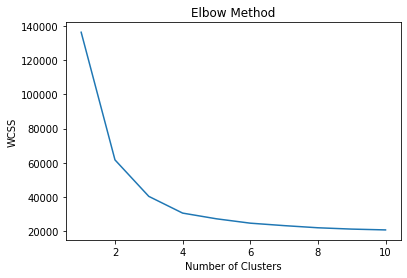

In [9]:
# Choose the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Choose the number of clusters based on the elbow plot
k = 3

In [11]:
# Run k-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_norm)

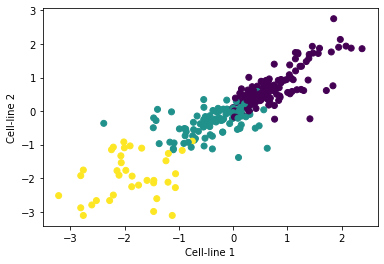

In [12]:
# Visualize the clusters
plt.scatter(data_norm.iloc[:, 1], data_norm.iloc[:, 2], c=clusters, cmap='viridis')
plt.xlabel('Cell-line 1')
plt.ylabel('Cell-line 2')
plt.show()

### Principal Component Analysis (PCA) - Dimensionality reduction

In [13]:
# Perform PCA
pca = PCA(n_components=3)
pca.fit(data_norm)
pca_data = pca.transform(data_norm)

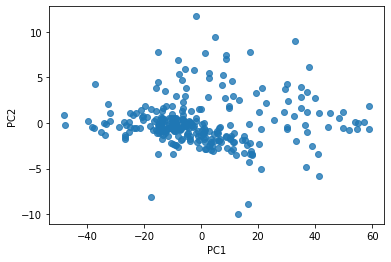

In [14]:
# Visualize the results
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Select K Best

In [15]:
# transpose dataset
transposed_df = extracted_df.transpose()
transposed_df

id,NOG,SP1,CREBBP,IGFBP2,IGFBP3,PTPN11,CISD2,RELA,GRN,SUN1,...,RAD52,RAD51,CEBPB,CEBPA,XRCC5,TFDP1,IKBKB,AGTR1,PDGFB,PLAU
MDB-EE-A2GE-06,1.640,11.27,11.14,13.38,15.61,11.52,9.14,10.73,14.06,11.82,...,5.90,6.58,9.75,8.47,12.80,10.09,10.19,3.5800,9.82,11.81
MDB-ER-A193-06,1.200,10.66,10.84,13.65,11.58,11.08,8.98,11.09,13.61,10.99,...,6.27,6.93,10.33,9.83,13.19,10.68,10.23,4.3400,8.49,9.79
MDB-EB-A3Y6-01,3.530,10.48,10.49,8.57,11.27,11.05,9.41,10.99,14.28,11.15,...,6.43,7.43,9.27,7.74,13.23,9.98,10.22,2.6900,8.54,9.25
MDB-D3-A5GO-06,0.000,11.30,11.10,7.16,9.84,10.57,10.27,11.98,14.38,11.23,...,6.37,7.85,10.99,8.59,12.70,11.01,10.44,5.7600,7.83,9.30
MDB-LH-A9QB-06,0.000,10.79,11.07,14.03,17.00,11.06,9.04,11.30,13.08,11.25,...,6.31,6.86,12.06,6.10,12.66,11.13,10.64,4.0600,7.46,7.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MDB-GF-A4EO-06,0.000,11.52,10.75,11.16,11.97,11.45,9.94,11.65,13.84,10.97,...,6.26,7.12,10.32,8.88,12.65,10.38,10.35,0.0000,7.32,10.03
MDB-EE-A29V-06,0.000,10.57,11.07,8.55,9.28,10.75,9.59,11.86,15.49,10.18,...,5.87,8.97,9.89,6.40,12.93,10.65,9.02,2.1200,8.11,8.71
MDB-EB-A44R-06,0.205,11.45,11.34,9.05,10.25,11.80,8.57,10.31,14.05,12.50,...,7.43,6.45,9.43,7.60,12.76,11.39,11.18,4.4200,7.98,7.94
MDB-D3-A51E-06,5.210,11.60,10.79,8.38,11.78,11.42,9.16,10.65,14.34,10.77,...,6.81,8.41,10.15,6.79,12.60,10.74,10.39,1.9600,7.59,10.60


In [16]:
# Split into input features (X) and target variable (y)
X = transposed_df.iloc[:, 1:]
y = transposed_df.index

k_best = SelectKBest(score_func=f_classif, k=100)
k_best.fit(X, y)

selected_indices = k_best.get_support(indices=True)

selected_genes = transposed_df.columns[selected_indices]

selected_df = transposed_df.iloc[:, selected_indices]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [17]:
selected_list = list(selected_df.columns)
print(selected_list)

['BLM', 'LEPR', 'INSR', 'PDGFRA', 'PTK2B', 'BUB3', 'HRAS', 'UCHL1', 'SOD1', 'TERT', 'AKT1', 'MYC', 'HESX1', 'S100B', 'EFEMP1', 'TXN', 'WRN', 'SERPINE1', 'POLG', 'POLB', 'C1QA', 'CLOCK', 'PSEN1', 'XRCC6', 'ERCC8', 'ERCC1', 'ERCC2', 'ERCC3', 'ERCC4', 'ERCC5', 'ERCC6', 'UBE2I', 'NGFR', 'PARP1', 'PCMT1', 'VCP', 'ABL1', 'HSP90AA1', 'TOP1', 'NBN', 'HDAC2', 'MED1', 'MLH1', 'PRDX1', 'APOE', 'SIRT1', 'PPARGC1A', 'SIRT7', 'POLA1', 'FEN1', 'TPP2', 'JUND', 'PTPN1', 'JAK2', 'PPARG', 'PPARA', 'PRKDC', 'CCNA2', 'FLT1', 'CLU', 'MAP3K5', 'TP53', 'TOP2B', 'ELN', 'LEP', 'HSPA1A', 'MXI1', 'HSPA9', 'VEGFA', 'HTRA2', 'TP73', 'TBP', 'EGFR', 'PMCH', 'RB1', 'TAF1', 'GSR', 'BDNF', 'SOD2', 'BSCL2', 'GCLM', 'GCLC', 'ARNTL', 'GPX1', 'GPX4', 'HIC1', 'PLCG2', 'NFE2L2', 'NFE2L1', 'HDAC3', 'KL', 'RAD52', 'RAD51', 'CEBPB', 'CEBPA', 'XRCC5', 'TFDP1', 'IKBKB', 'AGTR1', 'PDGFB']


### Find most frequent high expression gene

In [18]:
# Filter the data to get only the high expression values
high_expression = transposed_df[transposed_df > 8.0]

# Count the number of times each gene has a high expression value
gene_counts = high_expression.count()

# Get the list of genes with frequent high expression
frequent_genes = gene_counts[gene_counts > 470].index.tolist()

print(frequent_genes)


['SP1', 'CREBBP', 'PTPN11', 'RELA', 'GRN', 'SUN1', 'SIN3A', 'BAX', 'PTK2', 'LMNA', 'PCNA', 'HDAC1', 'RPA1', 'STAT3', 'APP', 'EEF2', 'GSS', 'HBP1', 'TRAP1', 'PEX5', 'ATP5O', 'HTT', 'MTOR', 'HSF1', 'MDM2', 'CSNK1E', 'PRKCD', 'MAX', 'EEF1A1', 'HIF1A', 'PPP1CA', 'ARHGAP1', 'GRB2', 'MAPK14', 'SUMO1', 'HSPD1', 'EMD', 'PDPK1', 'CAT', 'JUN', 'A2M', 'GSK3A', 'UBB', 'CTNNB1', 'RAE1', 'EP300', 'APEX1', 'YWHAZ', 'PML', 'HSPA8', 'DGAT1', 'CDC42', 'ZMPSTE24', 'FOXO3', 'SDHC', 'GSK3B', 'AIFM1', 'NCOR2', 'NCOR1', 'NFKB1', 'NFKB2', 'GSTP1', 'IGF1R', 'STUB1', 'HMGB2', 'HMGB1', 'SHC1', 'FOS', 'SQSTM1', 'MAPK3', 'STAT5B', 'TCF3', 'BUB3', 'SOD1', 'AKT1', 'TXN', 'POLG', 'PSEN1', 'XRCC6', 'ERCC1', 'ERCC3', 'ERCC5', 'UBE2I', 'PARP1', 'PCMT1', 'VCP', 'ABL1', 'HSP90AA1', 'TOP1', 'HDAC2', 'MED1', 'MLH1', 'PRDX1', 'APOE', 'FEN1', 'JUND', 'PTPN1', 'PRKDC', 'TOP2B', 'HSPA1A', 'MXI1', 'HSPA9', 'HTRA2', 'SOD2', 'BSCL2', 'GPX1', 'GPX4', 'NFE2L2', 'NFE2L1', 'XRCC5', 'TFDP1', 'IKBKB']


In [19]:
# Get the list of genes with frequent high expression, sorted by count
frequent_genes2 = gene_counts[gene_counts > 470].sort_values(ascending=False).index.tolist()

frequent_genes2

['IKBKB',
 'NFKB1',
 'PPP1CA',
 'ARHGAP1',
 'GRB2',
 'MAPK14',
 'SUMO1',
 'HSPD1',
 'EMD',
 'PDPK1',
 'A2M',
 'UBB',
 'CTNNB1',
 'RAE1',
 'EP300',
 'APEX1',
 'YWHAZ',
 'PML',
 'HSPA8',
 'CDC42',
 'ZMPSTE24',
 'SDHC',
 'TFDP1',
 'AIFM1',
 'NCOR2',
 'HIF1A',
 'EEF1A1',
 'MAX',
 'RPA1',
 'CREBBP',
 'PTPN11',
 'RELA',
 'GRN',
 'SUN1',
 'SIN3A',
 'BAX',
 'PTK2',
 'LMNA',
 'PCNA',
 'STAT3',
 'CSNK1E',
 'APP',
 'EEF2',
 'GSS',
 'HBP1',
 'TRAP1',
 'PEX5',
 'ATP5O',
 'HTT',
 'MTOR',
 'HSF1',
 'NCOR1',
 'GSK3B',
 'PCMT1',
 'ERCC1',
 'UBE2I',
 'PARP1',
 'GSTP1',
 'VCP',
 'ABL1',
 'HSP90AA1',
 'TOP1',
 'HDAC2',
 'MED1',
 'JUND',
 'PTPN1',
 'PRKDC',
 'TOP2B',
 'HSPA1A',
 'HSPA9',
 'HTRA2',
 'SOD2',
 'GPX4',
 'NFE2L2',
 'NFE2L1',
 'XRCC5',
 'ERCC3',
 'SP1',
 'XRCC6',
 'AKT1',
 'HMGB2',
 'HMGB1',
 'SHC1',
 'SQSTM1',
 'MAPK3',
 'STAT5B',
 'BUB3',
 'SOD1',
 'TCF3',
 'PSEN1',
 'POLG',
 'TXN',
 'MDM2',
 'FOS',
 'IGF1R',
 'STUB1',
 'BSCL2',
 'GSK3A',
 'HDAC1',
 'JUN',
 'APOE',
 'MLH1',
 'NFKB2',
 'PRKCD',